In [2]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
import pickle

In [8]:
import sys
module_path = '/Users/junhaoxiong 1/Documents/Projects/mgcpy'
if module_path not in sys.path:
    sys.path.append(module_path)
from mgcpy.independence_tests.dcorr import DCorr
from mgcpy.benchmarks.power import power
from mgcpy.benchmarks.simulations import *
from mgcpy.independence_tests.mgc.mgc import MGC
from mgcpy.independence_tests.rv_corr import RVCorr
from mgcpy.independence_tests.hhg import HHG
from mgcpy.independence_tests.kendall_spearman import KendallSpearman

In [4]:
def compute_distance_matrix(data_matrix_X, data_matrix_Y):
    # obtain the pairwise distance matrix for X and Y
    dist_mtx_X = squareform(pdist(data_matrix_X, metric='euclidean'))
    dist_mtx_Y = squareform(pdist(data_matrix_Y, metric='euclidean'))
    return (dist_mtx_X, dist_mtx_Y)

In [5]:
def power_vs_dimension(independence_test, simulation_type, dim_range):
    '''
    Generate power of an independence test given a simulation for a range of dimensions
    
    :param independence_test: an independence_test object
    :param simulation_type: a simulation function from mgcpy.benchmarks.simulations
    :param dim_range: the upper end of the range of dimension
    :return: power for each dimension
    '''
    estimated_power = np.zeros(dim_range)
    for d in range(1, dim_range+1):
        estimated_power[d-1] = power(independence_test, simulation_type, num_samples=100, num_dimensions=d)
    return estimated_power

In [6]:
def compute_all_power(simulation_type, dim_range):
    '''
    Compute power for each independence test for each dimension in a specified range 
    '''

    '''
    Initialize all independence test objects
    Data matrices initialized to np.nan, because in power computation each repeats involves generating new samples
    '''
    mcorr = DCorr(data_matrix_X=np.nan, data_matrix_Y=np.nan,
                  compute_distance_matrix=compute_distance_matrix, corr_type='mcorr')
    dcorr = DCorr(data_matrix_X=np.nan, data_matrix_Y=np.nan,
                  compute_distance_matrix=compute_distance_matrix, corr_type='dcorr')
    mantel = DCorr(data_matrix_X=np.nan, data_matrix_Y=np.nan,
                  compute_distance_matrix=compute_distance_matrix, corr_type='mantel')
    mgc = MGC(data_matrix_X=np.nan, data_matrix_Y=np.nan, compute_distance_matrix=compute_distance_matrix)
    rv_corr = RVCorr(data_matrix_X=np.nan, data_matrix_Y=np.nan, compute_distance_matrix=compute_distance_matrix)
    hhg = HHG(data_matrix_X=np.nan, data_matrix_Y=np.nan, compute_distance_matrix=compute_distance_matrix)
    
    independence_tests = {'MGC': mgc, 'MCorr': mcorr, 'DCorr': dcorr, 'Mantel': mantel, 'RV Corr': rv_corr}#, 'HHG': hhg}
    power_results = {}
    
    # compute power for each test for each dimension
    for name, test in independence_tests.items():
        power = power_vs_dimension(test, simulation_type, dim_range)
        power_results[name] = power
        print('{} finished'.format(name))
    
    return power_results

In [7]:
def plot_power_curve(power_results, simulation_name):
    '''
    Plot the power of each independence test relative to mgc
    '''
    mgc_power = power_results['MGC']

    for name, power in power_results.items():     
        plt.plot(power-mgc_power, label=name)
   
    plt.xlabel('Dimensions')
    plt.ylabel('Power Relative to MGC')
    plt.legend()
    plt.gca().set_xlim(1, mgc_power.shape[0]+1)
    plt.xticks(np.arange(1, mgc_power.shape[0]+1))
    plt.title('Power \n Data: {} Simulation, 100 samples, noise=0'.format(simulation_name))
    plt.show()

In [17]:
%%time
power_results = compute_all_power(sin_sim, 10)

MGC finished
MCorr finished
DCorr finished
Mantel finished
RV Corr finished
CPU times: user 13min 56s, sys: 5.14 s, total: 14min 1s
Wall time: 14min


In [16]:
#power_results = pickle.load(open('../../NeuroData/power_curve_root.pkl', 'rb'))
#pickle.dump(power_results, open('../../NeuroData/power_curve_root.pkl', 'wb'))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: ResourceWarning: unclosed file <_io.BufferedWriter name='../../NeuroData/power_curve_root.pkl'>
  


In [18]:
power_results

{'DCorr': array([0.658, 0.395, 0.273, 0.214, 0.143, 0.102, 0.056, 0.045, 0.039,
        0.045]),
 'MCorr': array([0.721, 0.407, 0.268, 0.248, 0.109, 0.08 , 0.058, 0.05 , 0.049,
        0.041]),
 'MGC': array([1.   , 0.951, 0.288, 0.225, 0.087, 0.082, 0.061, 0.034, 0.042,
        0.047]),
 'Mantel': array([0.505, 0.245, 0.165, 0.144, 0.098, 0.06 , 0.041, 0.051, 0.051,
        0.037]),
 'RV Corr': array([0.345, 0.32 , 0.228, 0.184, 0.088, 0.064, 0.057, 0.039, 0.041,
        0.047])}

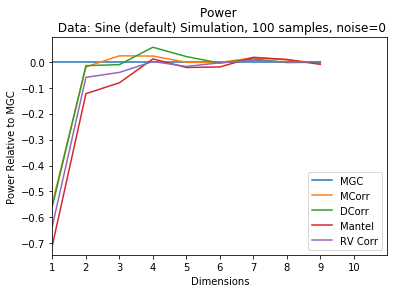

CPU times: user 129 ms, sys: 13.6 ms, total: 143 ms
Wall time: 142 ms


In [20]:
%%time
plot_power_curve(power_results, 'Sine (default)')

## Results for simulations
* ones that got the correct power curve
    * quadratic, w shape, two parabolas, fourth root, 
* ones that are incorrect
    * step function, spiral, sine(?)